In [217]:
import math 
import numpy as np 
import matplotlib.pyplot as plt

def OneHotEncode(y):
    """
    This function helps to change the labels to its corersponding 
    One Hot Encodings
    """
    _, y = universal_reshape(y,y)

    shape=(y.shape[1], y.max()+1)
    OHE = np.zeros(shape)
    rows = np.arange(y.shape[1])
    OHE[rows, y]=1
    
    return OHE

def universal_reshape(X, y):
        '''
        This function is for reshaping any types of X, y to the correct shapes
        for the custom mathematical computation done here
        '''
        if len(X.shape) == 1:
            X = X.reshape(1, len(X))

        if X.shape[0] > X.shape[1]: 
            X = X.T

        if len(y.shape) == 1:
            y = y.reshape(1, len(y))
            
        if y.shape[0] > y.shape[1]:
            y = y.T

        return X, y

class LogisticRegression:

    """
    Logistic Regression

    parameters:
    ----------

    X : ndarray
                The features to be fed to the model
    y : ndarray
                The labels to train this model (should not be one hot encoded)

    weight_initializer : string
                                1. uniform (will initialize uniformly)
                                2. random (will initialize randomly)

    epochs : int
                The number iterations the model should be trained to get the optimal results
    
    learning_rate : float
                        This will determine by how much the gradient descent would be 
                        maintained by the model for better training 

    """
    def __init__(self, X, y, weight_initializer='random'):
        self.X_train, self.y_train = universal_reshape(X, y)
        self.y_train = OneHotEncode(self.y_train)

        if weight_initializer == 'random':
            self.W = np.random.randn(self.y_train.shape[1], self.X_train.shape[0]) * 1/math.sqrt(self.X_train.shape[0])
        
        elif weight_initializer == 'uniform':
            limit = 1/math.sqrt(self.X_train.shape[0])
            self.W = np.random.uniform(-limit, limit, (self.y_train.shape[1], self.X_train.shape[0]))
        else:
            raise Exception("No such initialization availabel")
        
        self.b = np.zeros(shape=(1,1))
        self.history = {'loss': [], 'acc': []}
    
    def _softmax(self, Z):
        if Z.shape[0] < Z.shape[1]:
            Z = Z.T 
        
        diff = np.max(Z, axis=1)
        diff = diff.reshape(len(diff), 1)
        exps = np.exp(Z-diff)
        sums = np.sum(exps, axis=1, keepdims=True)
        softmax = exps/sums 
        return softmax
    
    def _feed_forward(self):
        Z = np.dot(self.W, self.X_train) + self.b 
        A = self._softmax(Z)
        return (Z, A)
    
    def predict(self, X):
        X, _ = universal_reshape(X, X)

        Z = np.dot(self.W, X) + self.b 
        A = self._softmax(Z)
        probabilities = np.argmax(A, axis=1)
        return probabilities
    
    def log_loss(self, prediction, ground_truth):
        m = len(prediction)
        loss = -1/m * np.sum(ground_truth * np.log(prediction + 1e-8), keepdims=True)
        return loss

    def _accuracy(self, prediction, ground_truth):
        prediction = np.argmax(prediction, axis=1)
        if ground_truth.shape[0] != 1:
            ground_truth = np.argmax(ground_truth, axis=1)

        m = len(prediction)
        return 1/m * np.sum(prediction == ground_truth)
    
    def accuracy(self, prediction, ground_truth):
      ground_truth, ground_truth = universal_reshape(ground_truth, ground_truth)
      m = len(prediction)
      return 1/m * np.sum(prediction == ground_truth)

    def _compute_grads(self, A):
        m = len(A)
        delta = A - self.y_train 

        W_grad = np.dot(delta.T, self.X_train.T)
        b_grad = 1/m * np.sum(delta.T, keepdims=True)

        return (W_grad, b_grad)
    
    def fit(self, epochs, learning_rate=0.001, show_history=False):
        for epoch in range(1, epochs+1):
          Z_train, A_train = self._feed_forward()
          W_grad, b_grad = self._compute_grads(A_train)

          loss = self.log_loss(A_train, self.y_train)
          acc = self._accuracy(A_train, self.y_train)

          self.history['loss'].append(float(loss))
          self.history['acc'].append(float(acc))

          if epoch % 50  == 0:
              print(f"After epoch {epoch} loss: {loss} acc: {acc}")

          self.W -= learning_rate * W_grad 
          self.b -= learning_rate * b_grad

          # try to apply early stopping ... later 

        if show_history:
          print('showing history') 
          fig = plt.figure(figsize=(16, 6))
          fig.add_subplot(1,2,1)
          plt.title('Train loss curve')
          plt.plot(regressor.history['loss'])
          fig.add_subplot(1,2,2)
          plt.title('Train accuracy curve')
          plt.plot(regressor.history['acc'])            

In [218]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [219]:
data = pd.read_csv(r'/content/sample_data/mnist_train_small.csv')

In [220]:
features, labels = np.array(data.iloc[:,1:]), np.array(data.iloc[:, :1])

In [221]:
X_train, X_test, y_train, y_test = train_test_split(features, labels)

In [222]:
X_train = (X_train - np.mean(X_train)) / np.std(X_train)
X_test = (X_test - np.mean(X_test)) / np.std(X_test)

In [223]:
regressor = LogisticRegression(X_train, y_train)

After epoch 50 loss: [[1.66569589]] acc: 0.9093939595973065
After epoch 100 loss: [[1.54830044]] acc: 0.9154610307353823
After epoch 150 loss: [[3.52021246]] acc: 0.808187212480832
After epoch 200 loss: [[3.48302841]] acc: 0.810520701380092
showing history


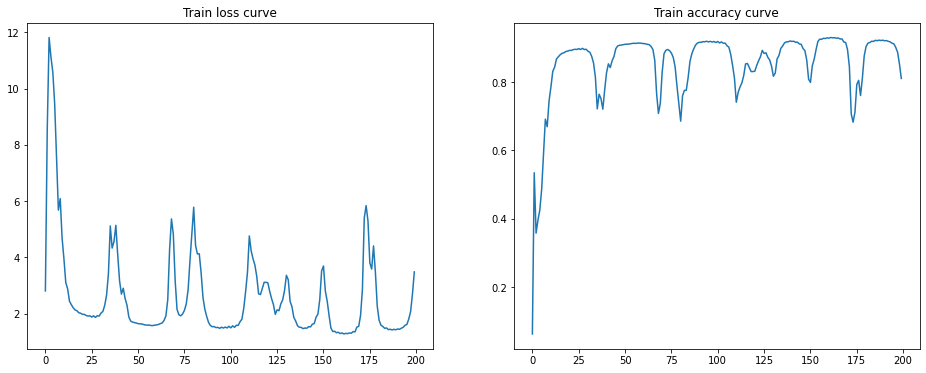

In [224]:
regressor.fit(epochs=200, learning_rate=0.03, show_history=True)

In [225]:
preds = regressor.predict(X_test)

In [226]:
regressor.accuracy(preds, y_test)

0.7204